In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/MyDrive/GAN"

%cd /content/gdrive/MyDrive/GAN


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/GAN


In [4]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-lf_2i1fe
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-lf_2i1fe
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done


In [5]:
from numpy import expand_dims
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

import tensorflow_datasets as tfds

from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

from tensorflow.keras.preprocessing.image import img_to_array
# import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, LeakyReLU,Input,Activation,Concatenate,\
Conv2DTranspose
from tensorflow.keras.utils import plot_model,load_img
import PIL

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
np.random.seed(401)

In [6]:
# load the model
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_PHtoM_000600.h5', cust,compile=False)

In [7]:
model_AtoB.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_33 (Conv2D)          (None, 256, 256, 64)         9472      ['input_4[0][0]']             
                                                                                                  
 instance_normalization_32   (None, 256, 256, 64)         128       ['conv2d_33[0][0]']           
 (InstanceNormalization)                                                                          
                                                                                                  
 activation_15 (Activation)  (None, 256, 256, 64)         0         ['instance_normalization

In [8]:
# use the photo as input dataset and predict/generate Monet style img then save to the output directory
def pred_save(img_in,G_model,path,i):
    prediction = G_model.predict(img_in)
    prediction = prediction[0]
    prediction = (prediction*127.5+127.5).astype(np.uint8)  # rescale
#     print(prediction)
#     print(prediction.shape)
    im = PIL.Image.fromarray(prediction)
    im.save(f'{path}{str(i)}.jpg')

In [9]:
# function to load img and convert to array,scale
def load_images(path,start,end,size=(256,256)):
    data_list = list()
    _list=os.listdir(path)
    # print(_list)
    for file in _list[start:end]:
        # print(file)
        # print(path+file)
        img = load_img(path+file)
        img = img_to_array(img)
        img = img/127.5-1
        data_list.append(img)
    return np.asarray(data_list)

In [10]:
# load the dataset path and take a look at all the folders inside
IMG_DIR = '/content/gdrive/MyDrive/GAN'
Photo_jpg = IMG_DIR+'/photo_jpg/'

In [11]:
# load photo, conver to array
# file 0-1001

Photo_arr = load_images(Photo_jpg,0,1001)
print(Photo_arr.shape)


(1001, 256, 256, 3)


In [14]:
# create a new folder to store generated img

os.makedirs('/content/gdrive/MyDrive/GAN/images_1/')
path = '/content/gdrive/MyDrive/GAN/images_1/'
# generate imgs for all the photos
for i in range(Photo_arr.shape[0]):
    img_in = Photo_arr[i][np.newaxis,:]
    pred_save(img_in,model_AtoB,path,i)

n = len(os.listdir(path))
print(f'{n} images generted!')

1/1 [==============================] - 0s 24ms/step
1001 images generted!


(256, 256, 3)


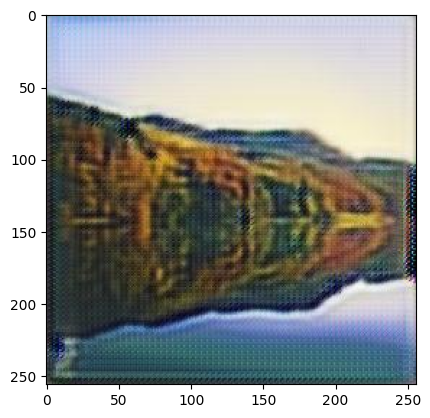

In [18]:
# take a look at randomly selected img from generated folder
i = np.random.randint(0,n)
sample = path+os.listdir(path)[i]
sample_ph = imread(sample)
print(sample_ph.shape)
plt.imshow(sample_ph)